<a href="https://colab.research.google.com/github/ayeshagunarathne/Transformer_Neural_Networks/blob/main/Understanding_Positional_encoding(Transformers).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a tutorial on how positional encoding works in transformer architecture introduced in the paper titled: ['Attention is all you need"](https://arxiv.org/abs/1706.03762)

References:
* https://github.com/ajhalthor/Transformer-Neural-Network/blob/main/Positional_Encoding_in_Transformer_neural_networks.ipynb


*   https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/





##What is positional encoding and how it is used in transformer architecture?


Given below is the architeure of the transformer introduced through the paper referenced above.

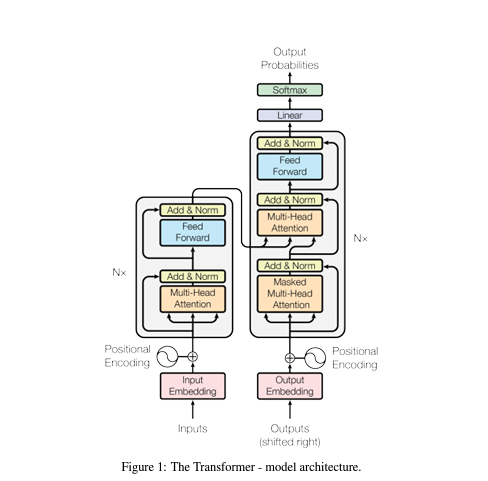


According to figure above,we can see that positional encoding is done after embedding(In simple terms embedding can be considered as a look up table where each of the tokens are mapped to a corresponding vector from an embedding matrix which has separate rows allocated for each token)


The purpose of the positional encoding is to define the order of squence of tokens.Because tranformers process data parallely and unless specifically mentioned,there is no way to undentify the order of tokens.The attention mechanism is directional and hence there's no specific connection between the column of the embeddings.Order of tokens is important in incoporating a contextual meaning to a sentence or a phrase.

Eg: **The bear ate a deer.**

if we reorder this sentence like this >> **The deer ate a bear**

The the meaning of the sentence gets changed when the sequence of the words get chnaged.

Positional encoding is used to order the tokens.

As of today,there are different positional encoding methods and some of the methods are named here:
1. Absolute positional encoding
2. Relative positional encoding
3. Frequency based positional encoding

Here we will focus only on frequency based positional encoding.



##Frequency Based Positional Encoding

In the paper, sine and cosine functions of different frequencies are used for the positional encoding.

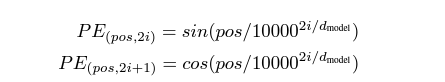

In the original paper **d_model = 512** (d_model is the dimension of the embedding and in the paper the values used is 512).

**pos is the position**

**i is the dimension.**

Each dimension of the positional encoding corresponds to a sinusoid. The wavelengths form a geometric progression from 2π to 10000 · 2π.

**Shown below is how we can implement above concept in pytorch.**
For simplicity d_model is 6 and the maximum length of the sequence is considered as 10



In [ ]:
import torch
import torch.nn as nn


max_sequence_length = 10
d_model = 6


PE_2i = torch.arange(0, d_model, 2).float()
print(f"The even positions:{PE_2i}")


denominator = torch.pow(10000, PE_2i/d_model)
print(f"The denominator :{denominator}")

pos = torch.arange(max_sequence_length, dtype=torch.float).reshape(max_sequence_length, 1)
print(f"position : {pos}")


PE = torch.zeros(max_sequence_length, d_model)
PE[:, 0::2] = torch.sin(pos / denominator)
PE[:, 1::2] = torch.cos(pos / denominator)
print(f"Positional Encoding : {PE}")




The even positions:tensor([0., 2., 4.])
The denominator :tensor([  1.0000,  21.5443, 464.1590])
position : tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])
Positional Encoding : tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])
